In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
import random
import time

In [2]:
def TDT(n1,n2,n3,n4,n5,n6):
    b = n1+n3+2*n4; c = n2+n3+2*n5
    if b +c == 0:
        return 0
    else:
        return (b-c)**2/(b+c)

In [3]:
def LS(p,q,r,s,t,u): #local sensitivity
    stat = TDT(p,q,r,s,t,u); v = np.zeros(0)
    M = TDT(p,q,r,s,t,u); m = TDT(p,q,r,s,t,u)
    if p >= 1:
        v = [TDT(p-1,q+1,r,s,t,u), TDT(p-1,q,r+1,s,t,u), TDT(p-1,q,r,s+1,t,u), 
             TDT(p-1,q,r,s,t+1,u), TDT(p-1,q,r,s,t,u+1)]
        M = max([max(v),M])
        m = min([min(v),m])
    if q >= 1:
        v = [TDT(p+1,q-1,r,s,t,u), TDT(p,q-1,r+1,s,t,u), TDT(p,q-1,r,s+1,t,u), 
             TDT(p,q-1,r,s,t+1,u), TDT(p,q-1,r,s,t,u+1)]
        M = max([max(v),M])
        m = min([min(v),m])
    if r >= 1:
        v = [TDT(p+1,q,r-1,s,t,u), TDT(p,q+1,r-1,s,t,u), TDT(p,q,r-1,s+1,t,u), 
             TDT(p,q,r-1,s,t+1,u), TDT(p,q,r-1,s,t,u+1)]
        M = max([max(v),M])
        m = min([min(v),m])
    if s >= 1:
        v = [TDT(p+1,q,r,s-1,t,u), TDT(p,q+1,r,s-1,t,u), TDT(p,q,r+1,s-1,t,u), 
             TDT(p,q,r,s-1,t+1,u), TDT(p,q,r,s-1,t,u+1)]
        M = max([max(v),M])
        m = min([min(v),m])
    if t >= 1:
        v = [TDT(p+1,q,r,s,t-1,u), TDT(p,q+1,r,s,t-1,u), TDT(p,q,r+1,s,t-1,u), 
             TDT(p,q,r,s+1,t-1,u), TDT(p,q,r,s,t-1,u+1)]
        M = max([max(v),M])
        m = min([min(v),m])
    if u >= 1:
        v = [TDT(p+1,q,r,s,t,u-1), TDT(p,q+1,r,s,t,u-1), TDT(p,q,r+1,s,t,u-1), 
             TDT(p,q,r,s+1,t,u-1), TDT(p,q,r,s,t+1,u-1)]
        M = max([max(v),M])
        m = min([min(v),m])
    
    return max([M-stat, stat-m])

In [4]:
def LS_Max(n): #max of local sensitivity = global sensitivity
    m = 0
    for p in range(n+1):
        for q in range(n-p+1):
            for r in range(n-p-q+1):
                for s in range(n-p-q-r+1):
                    for t in range(n-p-q-r-s+1):
                        u = n-p-q-r-s-t
                        if p+2*s >= q+2*t:
                            m = max([LS(p,q,r,s,t,u),m])
    return m

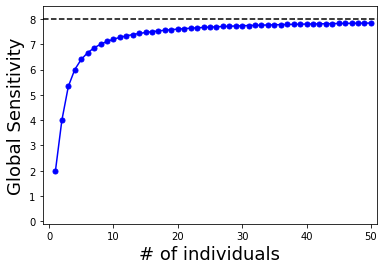

In [5]:
maxLS = np.zeros(50); index = np.zeros(50)

for i in range(50):
    maxLS[i] = LS_Max(i+1)
    index[i] = i+1

fig = plt.figure()
plt.ylim(-0.1, 8.5)
plt.xlim(-1, 51)
plt.hlines(8,-1,51,color="black", linestyle = "dashed")
plt.plot(index, maxLS, marker="o", markersize=5, color = "blue", linestyle = "-")
plt.xlabel("# of individuals", fontsize = 18)
plt.ylabel("Global Sensitivity", fontsize = 18)
fig.savefig("GS_TDT.png")
fig.savefig("figs/GS_TDT.eps", bbox_inches="tight", pad_inches=0.05)

In [6]:
def LS_min(n): #min of local sensitivity
    m = 8
    for p in range(n+1):
        for q in range(n-p+1):
            for r in range(n-p-q+1):
                for s in range(n-p-q-r+1):
                    for t in range(n-p-q-r-s+1):
                        u = n-p-q-r-s-t
                        if p+2*s >= q+2*t:
                            m = min([LS(p,q,r,s,t,u),m])
    return m

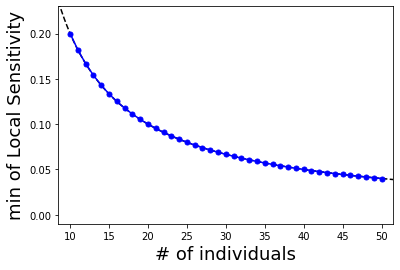

In [7]:
minLS = np.zeros(41); index = np.zeros(41)

for i in range(41):
    minLS[i] = LS_min(i+10)
    index[i] = i+10

fig = plt.figure()
plt.ylim(-0.01, 0.23)
plt.xlim(8.5, 51.5)
x = np.arange(8.5, 51.5, 0.02)
plt.plot(x,2/x,color="black", linestyle = "dashed")
plt.plot(index, minLS, marker="o", markersize=5, color = "blue", linestyle = "-")
plt.xlabel("# of individuals", fontsize = 18)
plt.ylabel("min of Local Sensitivity", fontsize = 18)
fig.savefig("minLS_TDT.png")
fig.savefig("figs/minLS_TDT.eps", bbox_inches="tight", pad_inches=0.05)